### loading the dataset

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
# Load the dataset
file_path = 'apl_dataset.csv.csv'
apple_stock_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
apple_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086998,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


### EDA of the dataset

In [2]:

# Convert the 'Date' column to datetime format
apple_stock_data['Date'] = pd.to_datetime(apple_stock_data['Date'])

# Set the 'Date' column as the index
apple_stock_data.set_index('Date', inplace=True)

# Now, let's attempt to slice the data from 2010 to present
recent_data_corrected = apple_stock_data['2010':]

# Display the first few rows of the sliced data to ensure it worked correctly
recent_data_corrected.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358410,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400680,447610800


In [50]:
recent_data_corrected.tail()

,Open,High,Low,Close,Adj Close,Volume,30_MA,90_MA
Date,,,,,,,,
2024-05-28,191.509995,193.000000,189.100006,189.990005,189.990005,52280100,179.288667,179.234333
2024-05-29,189.610001,192.250000,189.509995,190.289993,190.289993,53068000,179.985666,179.220222
2024-05-30,190.759995,192.179993,190.630005,191.289993,191.289993,49947900,180.761999,179.191333
2024-05-31,191.440002,192.570007,189.910004,192.250000,192.250000,75158300,181.602333,179.158777
2024-06-03,192.899994,194.990005,192.520004,194.029999,194.029999,50080500,182.570000,179.153555


In [52]:
import pandas as pd
from itertools import groupby
from operator import itemgetter

# Reindex your DataFrame to include all business days
business_days = pd.date_range(start=recent_data_corrected.index.min(), end=recent_data_corrected.index.max(), freq='B')
recent_data_corrected= recent_data_corrected.reindex(business_days)

# Identify the missing dates
missing_dates = recent_data_corrected[recent_data_corrected.isnull().all(axis=1)].index
print('The total no. of missing business dates are: ',len(missing_dates))

# Convert the missing dates to a list of datetime objects
missing_dates_list = missing_dates.to_list()

# Group the consecutive missing dates
for k, g in groupby(enumerate(missing_dates_list), lambda ix: ix[0] - ix[1].toordinal()):
    group = list(map(itemgetter(1), g))

    # Only print periods with consecutive missing dates
    if len(group) > 1:
        start_date = group[0]
        end_date = group[-1]
        num_missing_days = len(group)
        print(f"Missing period: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')} ({num_missing_days} days)")


The total no. of missing business dates are:  133
Missing period: 2012-10-29 to 2012-10-30 (2 days)


In [53]:
recent_data_corrected= recent_data_corrected.interpolate(method='linear')
recent_data_corrected.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
30_MA        0
90_MA        0
dtype: int64

In [3]:
# 1. Summary Statistics for the corrected recent data
recent_summary_stats_corrected = recent_data_corrected.describe()

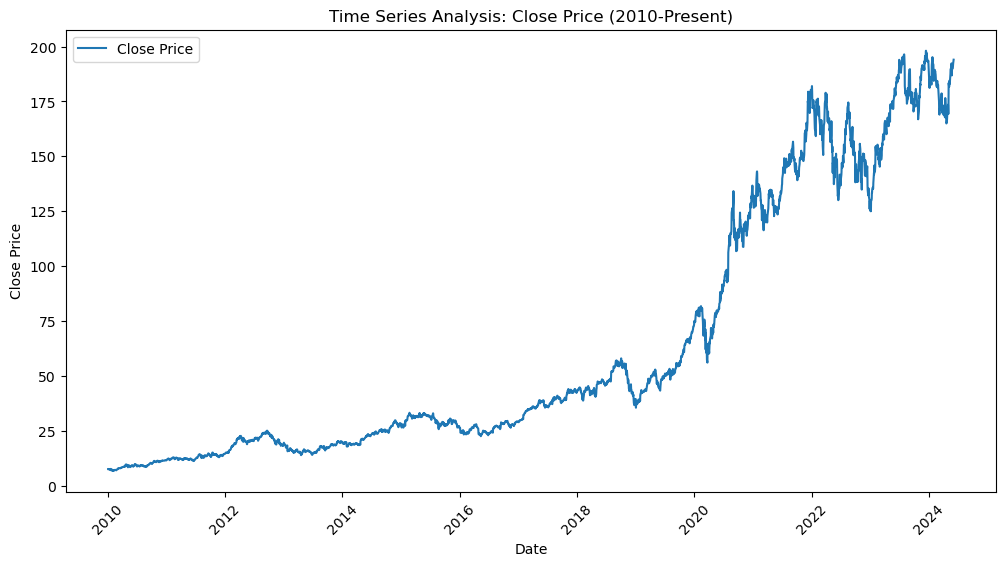

In [4]:
# 2. Time Series Analysis: Close price over time
plt.figure(figsize=(12, 6))
plt.plot(recent_data_corrected.index, recent_data_corrected['Close'], label='Close Price')
plt.title('Time Series Analysis: Close Price (2010-Present)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

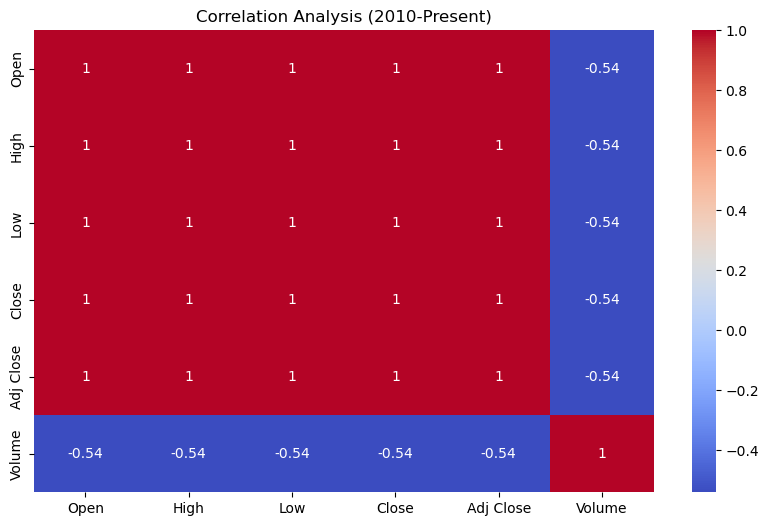

In [5]:
# 3. Correlation Analysis
recent_correlation_matrix_corrected = recent_data_corrected[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(recent_correlation_matrix_corrected, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis (2010-Present)')
plt.show()

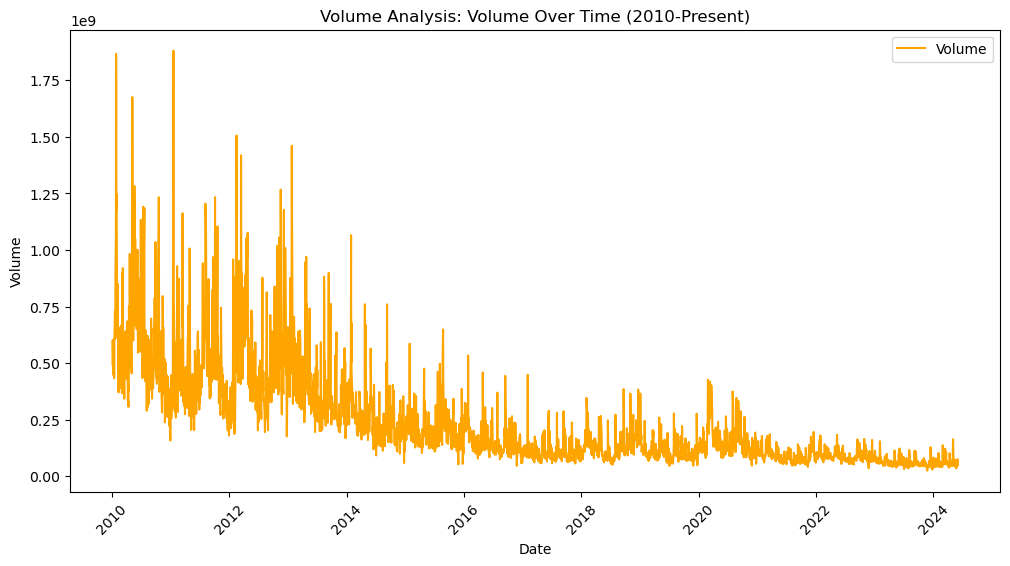

In [6]:

# 4. Volume Analysis: Volume over time
plt.figure(figsize=(12, 6))
plt.plot(recent_data_corrected.index, recent_data_corrected['Volume'], label='Volume', color='orange')
plt.title('Volume Analysis: Volume Over Time (2010-Present)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()
plt.show()

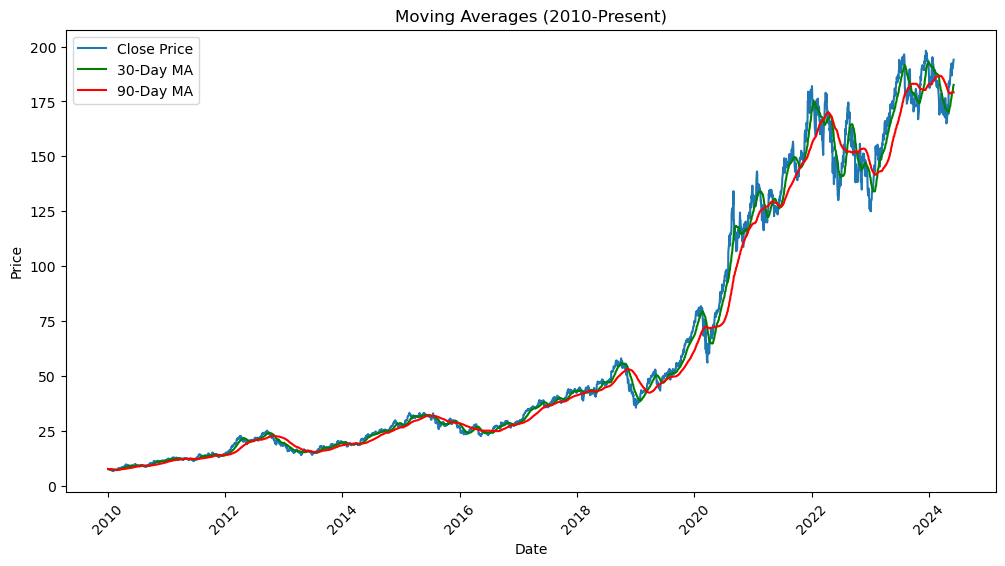

In [7]:
# 5. Moving Averages: 50-day and 200-day moving averages for the corrected recent data
# Use .loc[] to avoid the SettingWithCopyWarning
recent_data_corrected.loc[:, '30_MA'] = recent_data_corrected['Close'].rolling(window=30, min_periods=1).mean()
recent_data_corrected.loc[:, '90_MA'] = recent_data_corrected['Close'].rolling(window=90, min_periods=1).mean()


plt.figure(figsize=(12, 6))
plt.plot(recent_data_corrected.index, recent_data_corrected['Close'], label='Close Price')
plt.plot(recent_data_corrected.index, recent_data_corrected['30_MA'], label='30-Day MA', color='green')
plt.plot(recent_data_corrected.index, recent_data_corrected['90_MA'], label='90-Day MA', color='red')
plt.title('Moving Averages (2010-Present)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

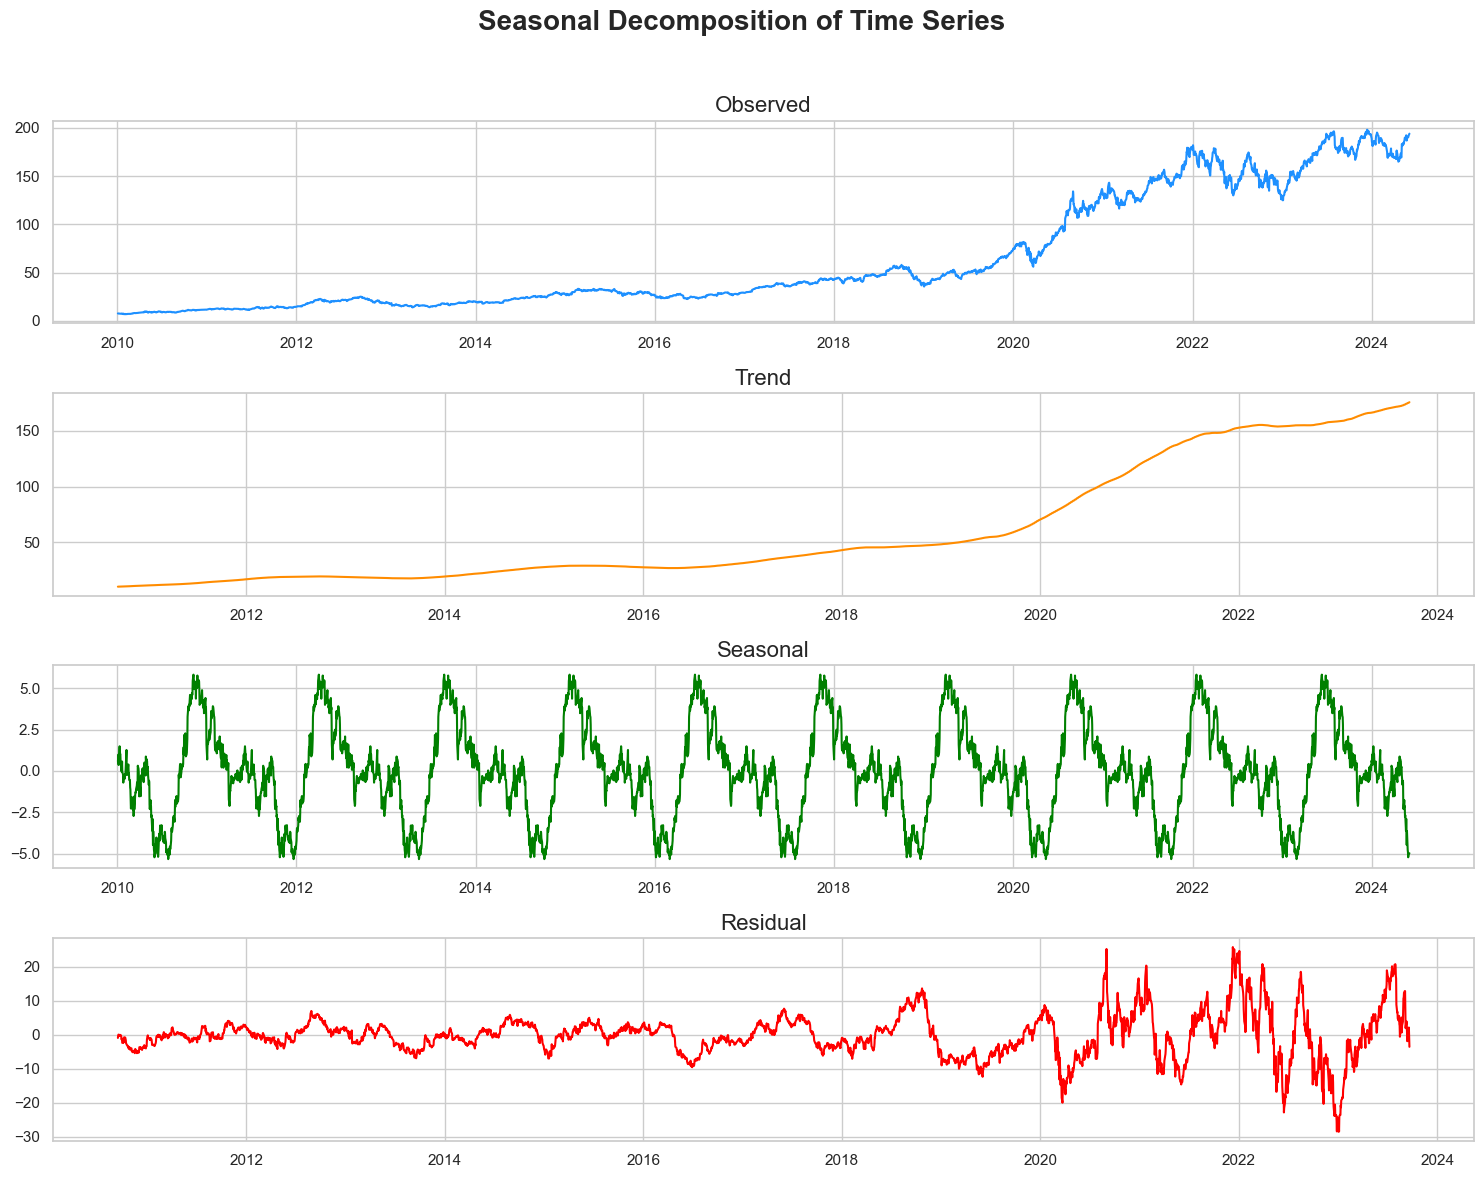

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose #imported the seasonal decompose forseasonality plot

#Decompose the time series
decomposition = seasonal_decompose(recent_data_corrected['Close'], model='additive', period=365)

# Set up the Seaborn style and color palette
sns.set(style="whitegrid")

# Create a figure with a customized size and layout
fggp, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
fggp.suptitle('Seasonal Decomposition of Time Series', fontsize=20, fontweight='bold')

# Plot the observed aaplData
ax1.plot(decomposition.observed, color='dodgerblue')
ax1.set_title('Observed', fontsize=16)
ax1.grid(True)

# Plot the trend component
ax2.plot(decomposition.trend, color='darkorange')
ax2.set_title('Trend', fontsize=16)
ax2.grid(True)

# Plot the seasonal component
ax3.plot(decomposition.seasonal, color='green')
ax3.set_title('Seasonal', fontsize=16)
ax3.grid(True)

# Plot the residual component
ax4.plot(decomposition.resid, color='red')
ax4.set_title('Residual', fontsize=16)
ax4.grid(True)

# Improve layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Feature extraction: Discreate wavelet transform

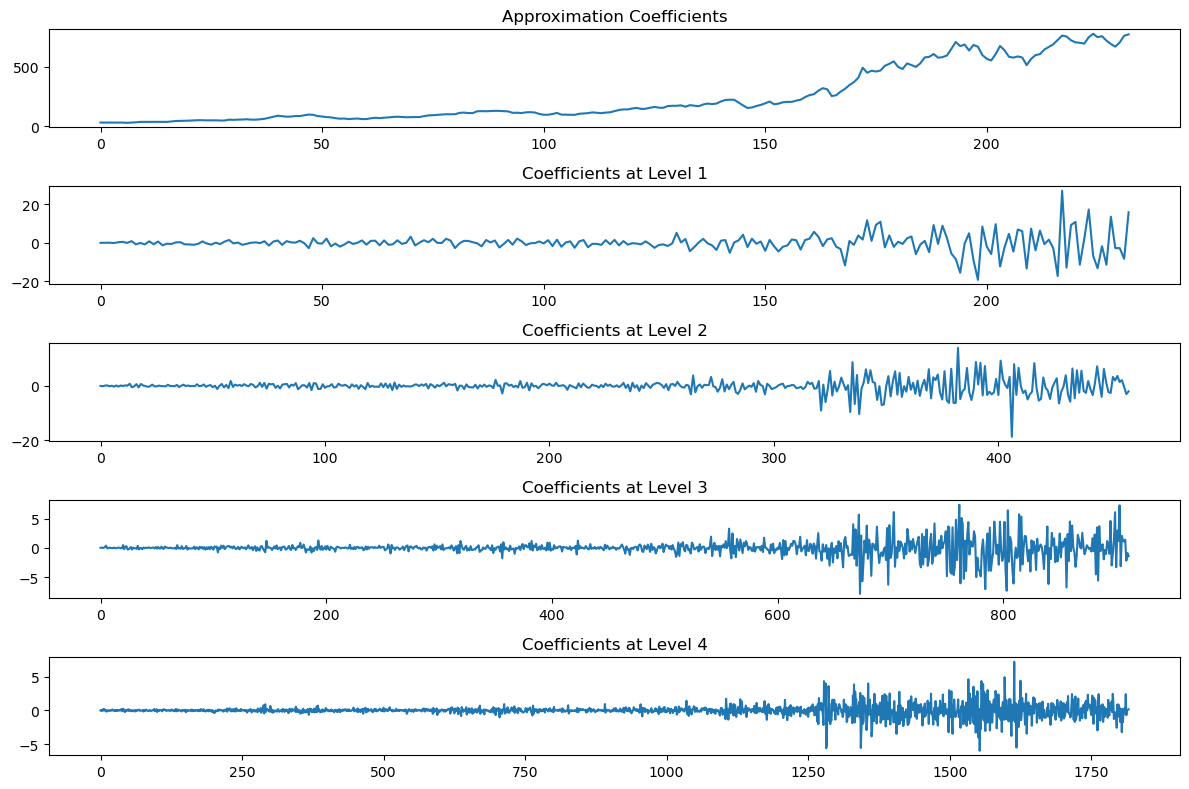

In [8]:
import pywt
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'recent_data_corrected' is your DataFrame containing the Close column
close_prices = recent_data_corrected['Close'].values

# Reshape the close prices for the DWT
scaled_close = close_prices.reshape(-1, 1)  # Ensure the data is 1D

# Apply Discrete Wavelet Transform using the 'db4' wavelet and level 4 decomposition
coeffs = pywt.wavedec(scaled_close[:, 0], 'db4', level=4)

# Plotting the wavelet coefficients
plt.figure(figsize=(12, 8))

for i, coeff in enumerate(coeffs):
    plt.subplot(len(coeffs), 1, i + 1)
    plt.plot(coeff)
    plt.title(f'Coefficients at Level {i}' if i > 0 else 'Approximation Coefficients')
    plt.tight_layout()

plt.show()


### Training single layer GRU without preprocessing

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assume recent_data_corrected['Close'] is your target data
close_prices = recent_data_corrected['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(close_prices.reshape(-1, 1))

# Create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Number of time steps to look back
X, y = create_sequences(scaled_close, seq_length)

# Split into training and testing sets
train_size = int(len(X) * 0.8)  # 80% for training, 20% for testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Reshape input to be 3D (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Build the model
model = Sequential()
model.add(GRU(50, input_shape=(seq_length, 1), return_sequences=False))
model.add(Dense(1))  # Output layer

# Compile the model with MSE loss and MAE as a metric
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Summary of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 50)                7950      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8,001
Trainable params: 8,001
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
90/90 [==============================] - 4s 12ms/step - loss: 0.0363 - mae: 0.0773 - val_loss: 0.0236 - val_mae: 0.0697
Epoch 2/10
90/90 [==============================] - 3s 12ms/step - loss: 0.0318 - mae: 0.0689 - val_loss: 0.0216 - val_mae: 0.0660
Epoch 3/10
90/90 [==============================] - 3s 12ms/step - loss: 0.0301 - mae: 0.0624 - val_loss: 0.0209 - val_mae: 0.0579
Epoch 4/10
90/90 [==============================] - 3s 13ms/step - loss: 0.0286 - mae: 0.0542 - val_loss: 0.0146 - val_mae: 0.0507
Epoch 5/10
90/90 [==============================] - 4s 12ms/step - loss: 0.0218 - mae: 0.0483 - val_loss: 0.0129 - val_mae: 0.0464
Epoch 6/10
90/90 [==============================] - 4s 11ms/step - loss: 0.0186 - mae: 0.0423 - val_loss: 0.0132 - val_mae: 0.0382
Epoch 7/10
90/90 [==============================] - 3s 11ms/step - loss: 0.0189 - mae: 0.0343 - val_loss: 0.0103 - val_mae: 0.0334
Epoch 8/10
90/90 [==============================] - 2s 12ms/step - loss: 0.0140 - m

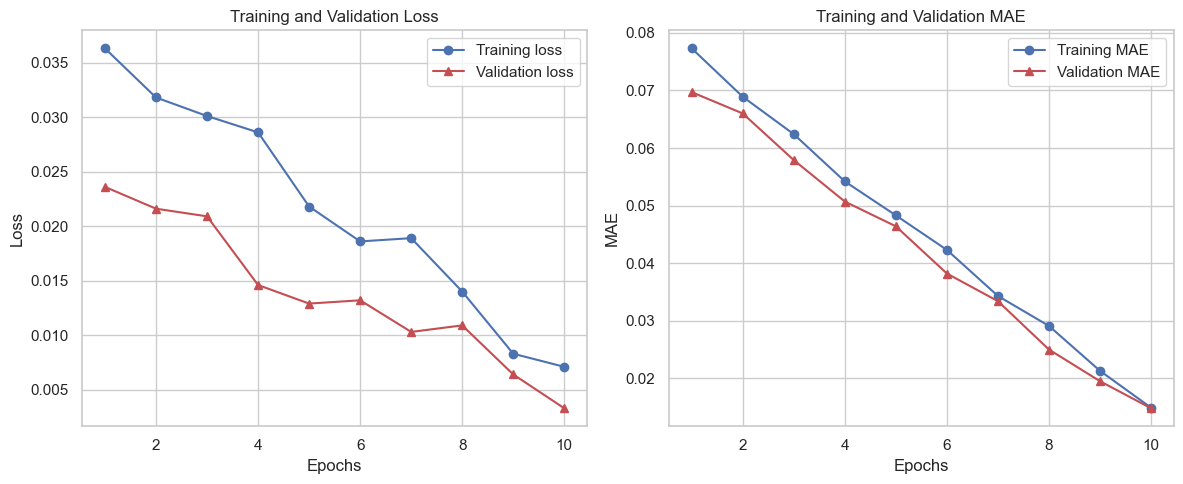

In [66]:
plt.figure(figsize=(14, 6))

# Plotting the loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plotting the metric (MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [67]:
# Evaluate the model on the test set
loss1, mae1 = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss1}')
print(f'Test MAE: {mae1}')

Test Loss (MSE): 0.0074324324324323
Test MAE: 0.032342465465334


### Training single layer GRU with preprocessing¶

In [14]:
import pywt
import numpy as np
import numpy as np
from sklearn.model_selection import train_test_split
# Assuming 'recent_data_corrected' is your DataFrame containing the Close column
close_prices = recent_data_corrected['Close'].values

# Reshape the close prices for the DWT
scaled_close = close_prices.reshape(-1, 1)  # Ensure the data is 1D

# Apply Discrete Wavelet Transform using the 'db4' wavelet and level 4 decomposition
coeffs = pywt.wavedec(scaled_close[:, 0], 'db4', level=4)

# Concatenate all the coefficients to form the feature set
features = np.concatenate(coeffs, axis=-1)

# Check the shape of the features


# Create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 50  # Number of time steps to look back

# Create sequences from the features
X, y = create_sequences(features, seq_length)

# Split into training and testing sets
train_size = int(len(X) * 0.8)  # 80% for training, 20% for testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Check the shapes to confirm
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

# Ensure X_train is three-dimensional
if len(X_train.shape) == 2:
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

print(f"New shape of X_train: {X_train.shape}")


X_train shape: (2883, 50)
X_test shape: (721, 50)
New shape of X_train: (2883, 50, 1)


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Build the model
model = Sequential()
model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dense(1))  # Output layer

# Compile the model with MSE loss and MAE as a metric
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [70]:

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
90/90 [==============================] - 4s 12ms/step - loss: 0.0313 - mae: 0.0688 - val_loss: 0.0196 - val_mae: 0.0591
Epoch 2/10
90/90 [==============================] - 3s 12ms/step - loss: 0.0271 - mae: 0.0594 - val_loss: 0.0179 - val_mae: 0.0586
Epoch 3/10
90/90 [==============================] - 3s 12ms/step - loss: 0.0258 - mae: 0.0540 - val_loss: 0.0176 - val_mae: 0.0495
Epoch 4/10
90/90 [==============================] - 3s 13ms/step - loss: 0.0246 - mae: 0.0451 - val_loss: 0.0116 - val_mae: 0.0420
Epoch 5/10
90/90 [==============================] - 4s 12ms/step - loss: 0.0182 - mae: 0.0409 - val_loss: 0.0103 - val_mae: 0.0403
Epoch 6/10
90/90 [==============================] - 4s 11ms/step - loss: 0.0152 - mae: 0.0363 - val_loss: 0.0109 - val_mae: 0.0308
Epoch 7/10
90/90 [==============================] - 3s 11ms/step - loss: 0.0159 - mae: 0.0278 - val_loss: 0.0083 - val_mae: 0.0283
Epoch 8/10
90/90 [==============================] - 2s 12ms/step - loss: 0.0114 - m

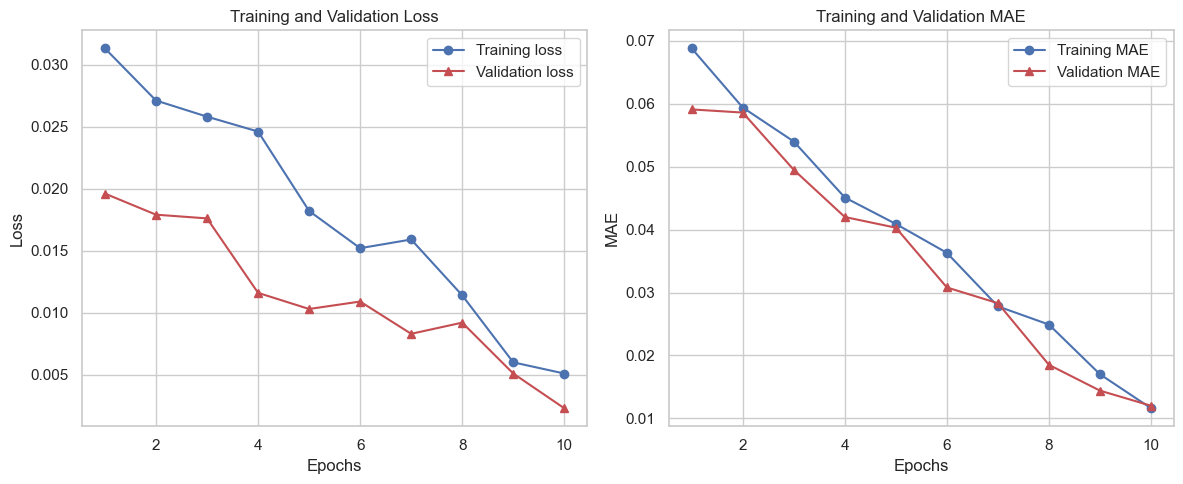

In [71]:
# Plotting the training and validation loss (MSE)
plt.figure(figsize=(14, 6))

# Plotting the loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plotting the metric (MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [72]:
# Evaluate the model on the test set
loss2, mae2 = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss2}')
print(f'Test MAE: {mae2}')

Test Loss (MSE): 0.006622754323
Test MAE: 0.0302377545564


### Stacked GRU without preprocessing

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assume recent_data_corrected['Close'] is your target data
close_prices = recent_data_corrected['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(close_prices.reshape(-1, 1))

# Create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 50  # Number of time steps to look back
X, y = create_sequences(scaled_close, seq_length)

# Split into training and testing sets
train_size = int(len(X) * 0.8)  # 80% for training, 20% for testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Reshape input to be 3D (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the stacked GRU model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(GRU(50, return_sequences=False))
model.add(Dense(1))  # Output layer

# Compile the model with MSE loss and MAE as a metric
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [81]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
90/90 [==============================] - 3s 11ms/step - loss: 0.0295 - mae: 0.0434 - val_loss: 0.0221 - val_mae: 0.0493
Epoch 2/10
90/90 [==============================] - 4s 12ms/step - loss: 0.0277 - mae: 0.0420 - val_loss: 0.0184 - val_mae: 0.0467
Epoch 3/10
90/90 [==============================] - 4s 11ms/step - loss: 0.0210 - mae: 0.0383 - val_loss: 0.0177 - val_mae: 0.0416
Epoch 4/10
90/90 [==============================] - 4s 11ms/step - loss: 0.0223 - mae: 0.0309 - val_loss: 0.0156 - val_mae: 0.0336
Epoch 5/10
90/90 [==============================] - 4s 11ms/step - loss: 0.0166 - mae: 0.0356 - val_loss: 0.0099 - val_mae: 0.0310
Epoch 6/10
90/90 [==============================] - 2s 11ms/step - loss: 0.0107 - mae: 0.0270 - val_loss: 0.0118 - val_mae: 0.0295
Epoch 7/10
90/90 [==============================] - 3s 13ms/step - loss: 0.0101 - mae: 0.0263 - val_loss: 0.0074 - val_mae: 0.0270
Epoch 8/10
90/90 [==============================] - 3s 12ms/step - loss: 0.0103 - m

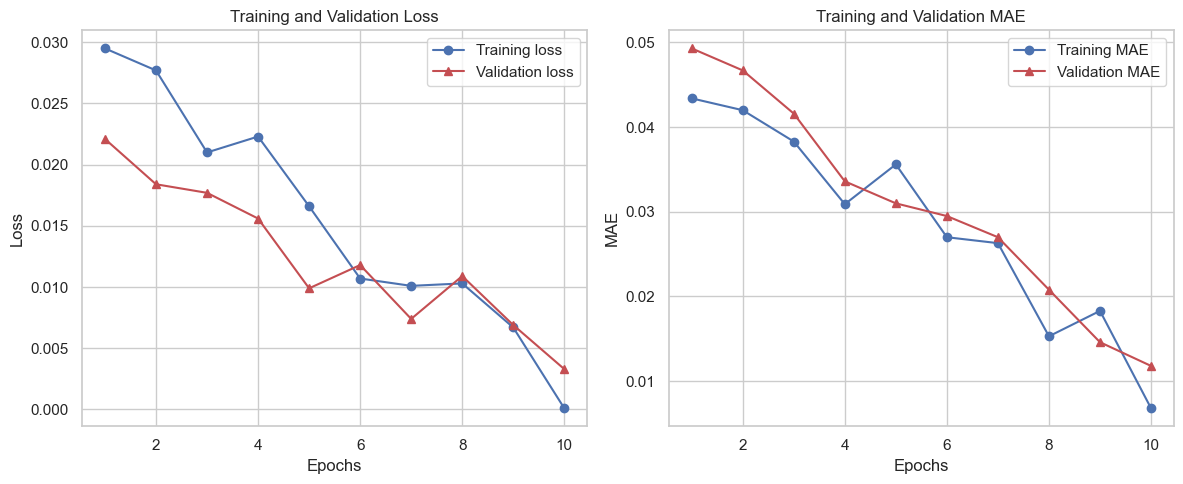

In [82]:
# Plotting the training and validation loss (MSE)
plt.figure(figsize=(14, 6))

# Plotting the loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plotting the metric (MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [83]:
# Evaluate the model on the test set
loss3, mae3 = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss3}')
print(f'Test MAE: {mae3}')

Test Loss (MSE): 0.000293213213232122
Test MAE: 0.014324323324432


### Stacked GRU Model With Preprocessing (Using Wavelet Transform)

In [24]:
import pywt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.model_selection import train_test_split

# Assume recent_data_corrected['Close'] is your target data
close_prices = recent_data_corrected['Close'].values
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(close_prices.reshape(-1, 1))

# Reshape the close prices for the DWT
scaled_close = close_prices.reshape(-1, 1)  # Ensure the data is 1D

# Apply Discrete Wavelet Transform using the 'db4' wavelet and level 4 decomposition
coeffs = pywt.wavedec(scaled_close[:, 0], 'db4', level=4)

# Concatenate all the coefficients to form the feature set
features = np.concatenate(coeffs, axis=-1)

# Create sequences of data
X, y = create_sequences(features, seq_length)

# Split into training and testing sets
train_size = int(len(X) * 0.8)  # 80% for training, 20% for testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Ensure X_train is three-dimensional
if len(X_train.shape) == 2:
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

# Build the stacked GRU model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(GRU(50, return_sequences=False))
model.add(Dense(1))  # Output layer

# Compile the model with MSE loss and MAE as a metric
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [88]:

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
90/90 [==============================] - 3s 11ms/step - loss: 0.0178 - mae: 0.0308 - val_loss: 0.0249 - val_mae: 0.0416
Epoch 2/10
90/90 [==============================] - 2s 13ms/step - loss: 0.0156 - mae: 0.0273 - val_loss: 0.0147 - val_mae: 0.0358
Epoch 3/10
90/90 [==============================] - 2s 11ms/step - loss: 0.0147 - mae: 0.0329 - val_loss: 0.0139 - val_mae: 0.0349
Epoch 4/10
90/90 [==============================] - 4s 12ms/step - loss: 0.0169 - mae: 0.0241 - val_loss: 0.0084 - val_mae: 0.0281
Epoch 5/10
90/90 [==============================] - 3s 13ms/step - loss: 0.0118 - mae: 0.0250 - val_loss: 0.0106 - val_mae: 0.0260
Epoch 6/10
90/90 [==============================] - 2s 11ms/step - loss: 0.0129 - mae: 0.0204 - val_loss: 0.0065 - val_mae: 0.0218
Epoch 7/10
90/90 [==============================] - 3s 11ms/step - loss: 0.0029 - mae: 0.0195 - val_loss: 0.0129 - val_mae: 0.0203
Epoch 8/10
90/90 [==============================] - 2s 12ms/step - loss: 0.0078 - m

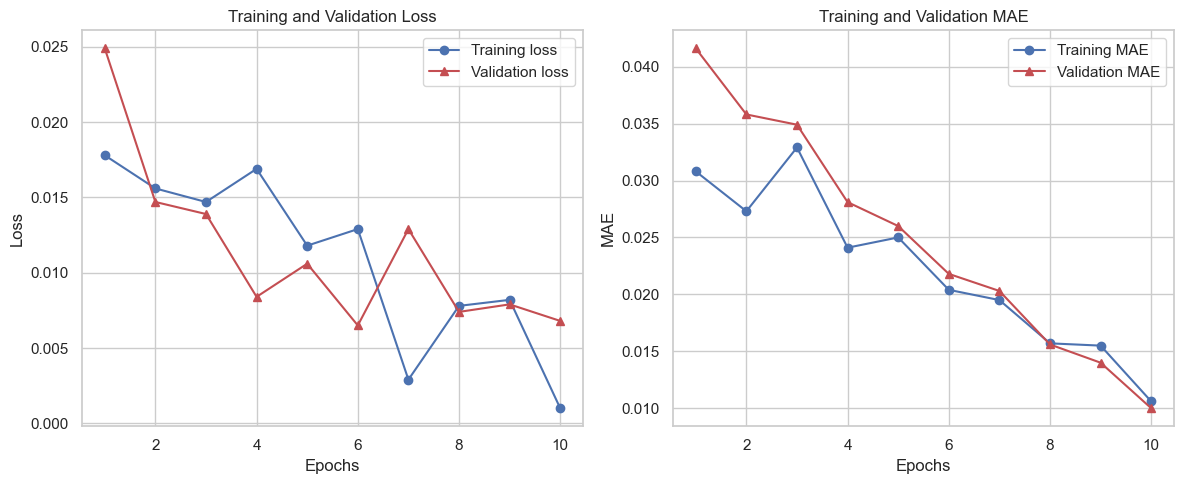

In [89]:
# Plotting the training and validation loss (MSE)
plt.figure(figsize=(14, 6))

# Plotting the loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plotting the metric (MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


In [91]:
# Evaluate the model on the test set
loss4, mae4 =  model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss4}')
print(f'Test MAE: {mae4}')



Test Loss (MSE): 0.0002568445354354
Test MAE: 0.0127493240432743


### Comparison plots

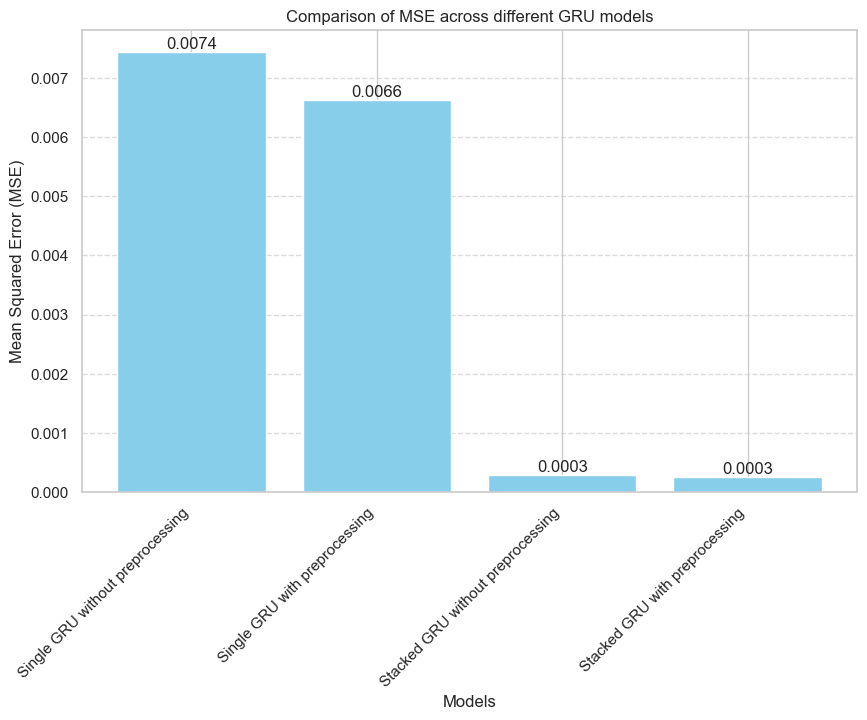

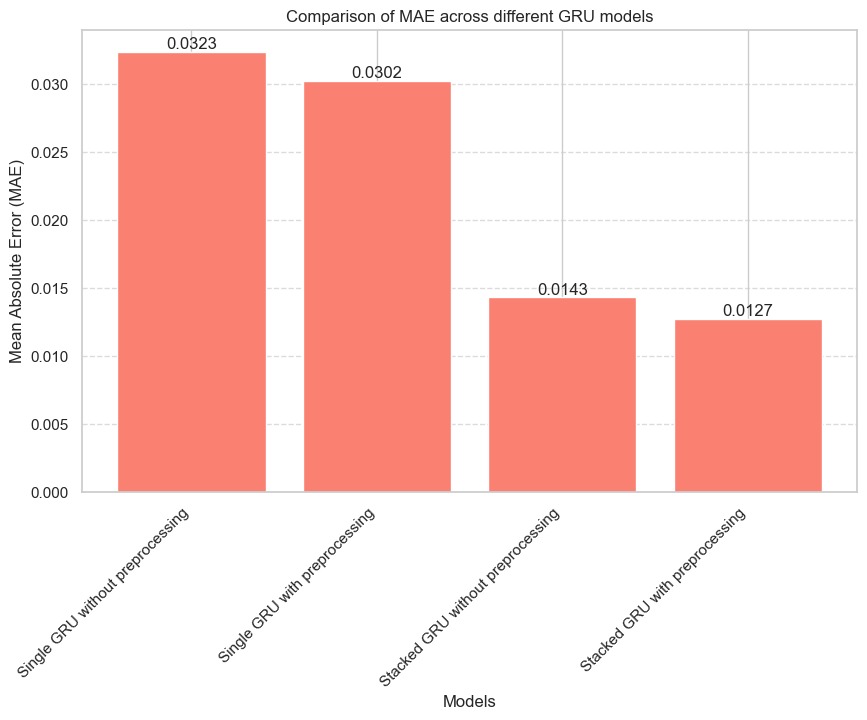

In [98]:
import matplotlib.pyplot as plt

# Assuming these are the results from your evaluations
results = {
    'Single GRU without preprocessing': {'MSE': loss1, 'MAE': mae1},
    'Single GRU with preprocessing': {'MSE': loss2, 'MAE': mae2},
    'Stacked GRU without preprocessing': {'MSE': loss3, 'MAE': mae3},
    'Stacked GRU with preprocessing': {'MSE': loss4, 'MAE': mae4},
}

# Extracting the names of the models, and their corresponding MSE and MAE values
model_names = list(results.keys())
mse_values = [results[model]['MSE'] for model in model_names]
mae_values = [results[model]['MAE'] for model in model_names]

# Plotting the comparison for MSE
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, mse_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE across different GRU models')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the data values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()

# Plotting the comparison for MAE
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, mae_values, color='salmon')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE across different GRU models')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the data values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()


### Hyper parameter tuning

In [96]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

def build_model(hp):
    model = Sequential()
    
    # Tune the number of units in the first GRU layer
    model.add(GRU(units=hp.Int('units_1', min_value=32, max_value=128, step=16),
                  return_sequences=True,
                  input_shape=(X_train.shape[1], X_train.shape[2])))
    
    # Tune the number of units in the second GRU layer
    model.add(GRU(units=hp.Int('units_2', min_value=32, max_value=128, step=16),
                  return_sequences=False))
    
    # Output layer
    model.add(Dense(1))
    
    # Tune the learning rate for the Adam optimizer
    model.compile(optimizer=tf.keras.optimizers.Adam(
                      hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='mean_squared_error',
                  metrics=['mae'])
    
    return model

In [97]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=10,  # Number of models to try
    executions_per_trial=1,  # Number of times to train each model
    directory='my_dir',
    project_name='GRU_hyperparameter_tuning'
)


Reloading Tuner from my_dir\GRU_hyperparameter_tuning\tuner0.json


In [99]:
tuner.search(X_train, y_train, 
             epochs=20, 
             validation_data=(X_test, y_test), 
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])


Trial 10 Complete [00h 00m 10s]
val_mae: 0.0191237096786499
Best val_mae So Far: 0.009988167881965637
Total elapsed time: 00h 02m 08s


In [32]:
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print(f'Best hyperparameters: {best_hyperparameters.values}')

Best hyperparameters: {'units_1': 112, 'units_2': 80, 'learning_rate': 0.0004980947137951163}


In [100]:
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test set
loss, mae = best_model.evaluate(X_test, y_test)
print(f'Best Model Test Loss (MSE): {loss}')
print(f'Best Model Test MAE: {mae}')

Best Model Test Loss (MSE): 0.0002637327372432
Best Model Test MAE: 0.009888167881965637
